Import the necessary libraries and read the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from scipy.stats import probplot
from scipy.stats import zscore

In [2]:
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Dropping columns deem unecessary for analysis.

In [3]:
df = df.drop(['Photo', 'Flag','Club Logo','Loaned From'], axis = 1)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Cleaning the data

In [4]:
cols = ['Value', 'Wage', 'Release Clause', 'Weight', 'Height']
df[cols] = df[cols].replace({'€':'', 'lbs':'','\'':'.'}, regex =True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72M,260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [5]:
def m(i):
        if type(i)==str:
            l=list(i)
            if l[-1]=='M':
                l.pop()
                d=''.join(l)
                d=float(d)*1000000
                return d
            elif l[-1]=='K':
                l.pop()
                d=''.join(l)
                d=float(d)*1000
                return d
        else:
            return i
df['Value'] = df['Value'].apply(m)
df['Wage'] = df['Wage'].apply(m)
df['Release Clause'] = df['Release Clause'].apply(m)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [6]:
df[['Weight', 'Height']] = df[['Weight', 'Height']].astype(float)

In [7]:
import datetime
df['Joined'] = pd.DatetimeIndex(df['Joined']).year
df['Contract Valid Until'] = pd.DatetimeIndex(df['Contract Valid Until']).year
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                      float64
Contract Valid Until        float64
Height                      float64
Weight                      float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       

In [8]:
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                        252
Wage                         241
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallContro

In [9]:
df1 = df
df1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [10]:
cols2 = ['Value', 'Wage', 'Release Clause','International Reputation','Weak Foot', 'Skill Moves',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
df1[cols2] = df1[cols2].fillna(df1[cols2].mean())
df1[cols2].head()

,Value,Wage,Release Clause,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,110500000.0,565000.0,226500000.0,5.0,4.0,4.0,5.70,159.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,77000000.0,405000.0,127100000.0,5.0,4.0,5.0,6.20,183.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,118500000.0,290000.0,228100000.0,5.0,5.0,5.0,5.90,150.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,72000000.0,260000.0,138600000.0,4.0,3.0,1.0,6.40,168.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,102000000.0,355000.0,196400000.0,4.0,5.0,4.0,5.11,154.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [11]:
df1.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve                          0
FKAccuracy                     0
LongPassing                    0
BallContro

# Exploratory Analysis

Plot the distribution of Overall rating for all players

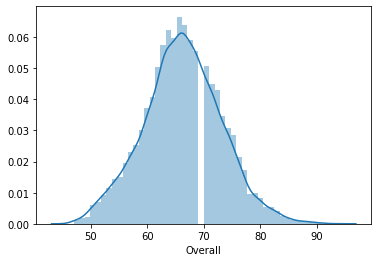

In [12]:
sns.distplot(df1['Overall'])
plt.show()

Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

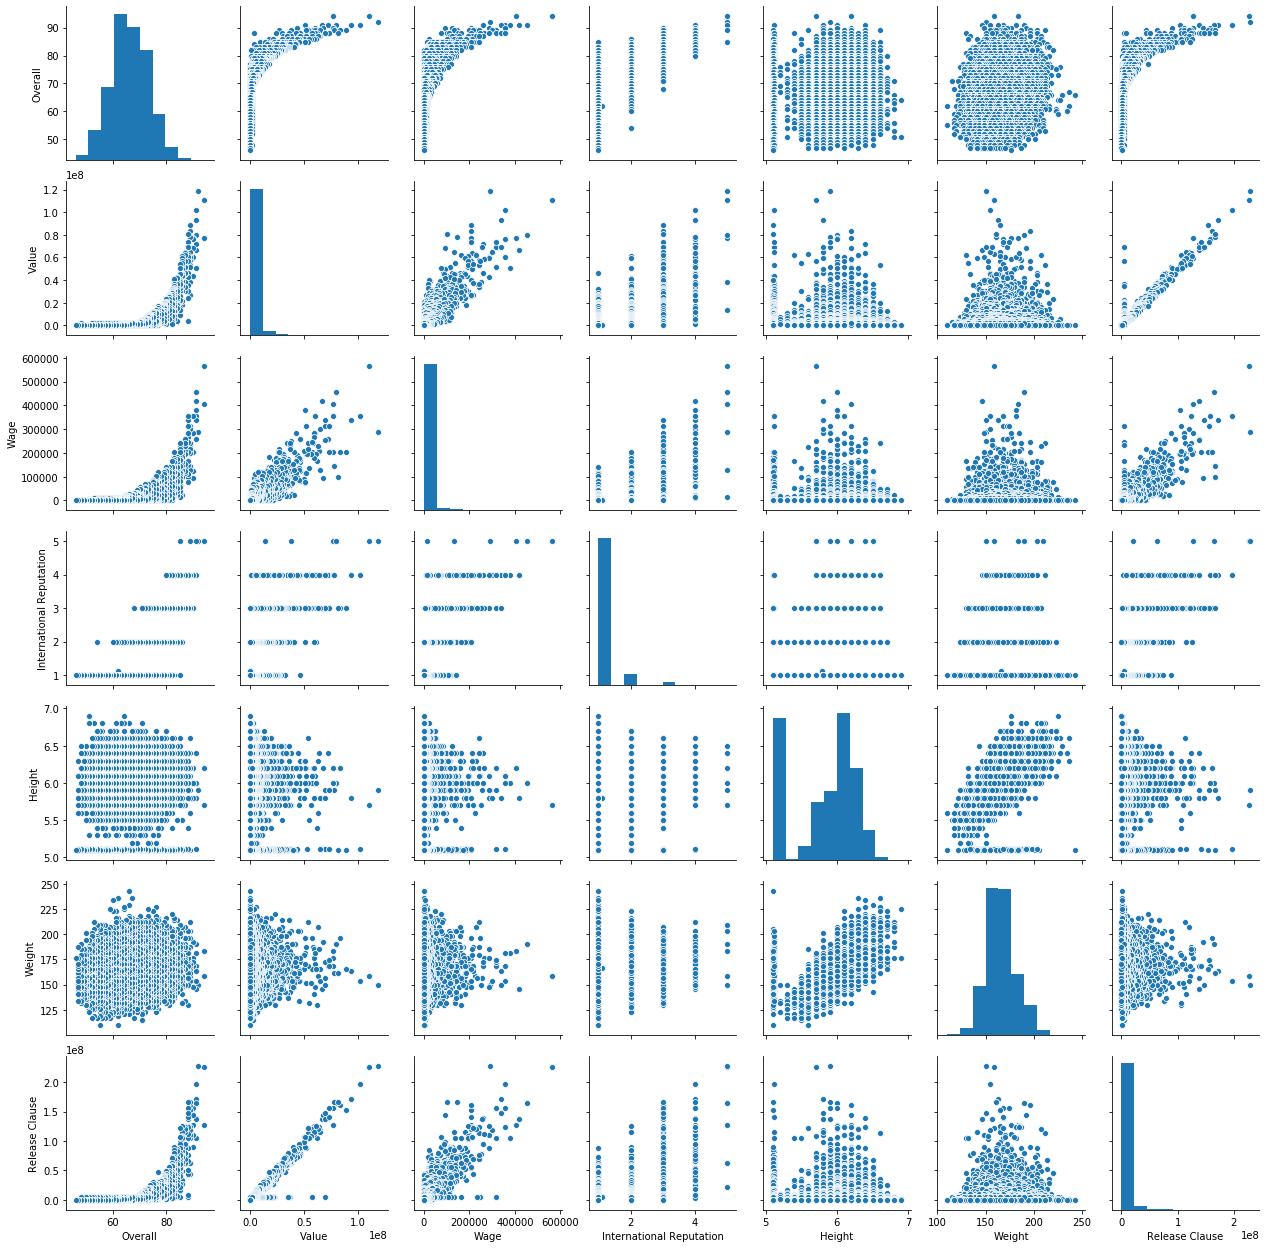

In [13]:
sns.pairplot(df1[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])
plt.show()

Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a)	What would the average wage for this set of players be?
b)	What is the average age?
c)	Is there a correlation between the Overall rating and Value for these players?

In [14]:
df1.sort_values(by ='Overall')
df1['ranked'] = df1['Overall'].rank(method = 'min', ascending = 0)
df1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,ranked
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,1.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,3.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,4.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,4.0


In [15]:
x = df1.where(df['Contract Valid Until'] ==2020.0 )

In [16]:
x.nsmallest(20,'Contract Valid Until')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,ranked
3,193080.0,De Gea,27.0,Spain,91.0,93.0,Manchester United,72000000.0,260000.0,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,4.0
5,183277.0,E. Hazard,27.0,Belgium,91.0,91.0,Chelsea,93000000.0,340000.0,Right,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,4.0
6,177003.0,L. Modrić,32.0,Croatia,91.0,91.0,Real Madrid,67000000.0,420000.0,Right,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,4.0
8,155862.0,Sergio Ramos,32.0,Spain,91.0,91.0,Real Madrid,51000000.0,380000.0,Right,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,4.0
13,168542.0,David Silva,32.0,Spain,90.0,90.0,Manchester City,60000000.0,285000.0,Left,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,10.0
21,179813.0,E. Cavani,31.0,Uruguay,89.0,89.0,Paris Saint-Germain,60000000.0,200000.0,Right,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,15.0
24,138956.0,G. Chiellini,33.0,Italy,89.0,89.0,Juventus,27000000.0,215000.0,Left,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0,15.0
31,190460.0,C. Eriksen,26.0,Denmark,88.0,91.0,Tottenham Hotspur,73500000.0,205000.0,Right,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,26.0
39,164240.0,Thiago Silva,33.0,Brazil,88.0,88.0,Paris Saint-Germain,24000000.0,165000.0,Right,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0,26.0
46,193041.0,K. Navas,31.0,Costa Rica,87.0,87.0,Real Madrid,30500000.0,195000.0,Right,...,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,62500000.0,43.0


In [17]:
x['Wage'].mean()

9347.922848664688

In [18]:
x['Age'].mean()

25.20919881305638

In [19]:
x['Overall'].corr(x['Value'])

0.6308801396832194

In [20]:
df1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,ranked
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,1.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,3.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,4.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,4.0


In [21]:
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve                          0
FKAccuracy                     0
LongPassing                    0
BallContro

4.	Generate tables containing the top 5 players by Overall rating for each unique position.
a)	Are there any players appearing in more than one Table. Please point out such players.
b)	What is the average wage one can expect to pay for the top 5 in every position?


In [26]:
df2 =pd.DataFrame()
df2=df1.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall'))
df2.index=df2.index.get_level_values(0)

dict_dfs={}
for i in df2.index:
    dict_dfs[i]=df2.loc[i]
df2

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,ranked
Position,,,,,,,,,,,,,,,,,,,,,
CAM,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,1.658000e+08,15.0
CAM,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,1.415000e+08,26.0
CAM,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,...,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,1.047000e+08,56.0
CAM,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,7.430000e+07,56.0
CAM,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,8.270000e+07,56.0
CB,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,9.020000e+07,10.0
CB,205600,S. Umtiti,24,France,87,92,FC Barcelona,57000000.0,205000.0,Left,...,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,1.211000e+08,43.0
CB,177509,M. Benatia,31,Morocco,86,86,Juventus,30000000.0,160000.0,Right,...,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,4.950000e+07,56.0
CB,192366,N. Otamendi,30,Argentina,85,85,Manchester City,28500000.0,170000.0,Right,...,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,5.270000e+07,78.0


a)	Are there any players appearing in more than one Table. Please point out such players. - NO

In [29]:
list_ids=[]

# Getting the IDs of all 5 players from each dataframe 
for i in dict_dfs.keys():
    list_ids.append(list(dict_dfs[i].ID))
    
# Coverting the list of lists to a flat list
list_ids_final=[]
for sublist in list_ids:
    for item in sublist:
        list_ids_final.append(item)
        
# Checking for duplicates
for i in list_ids_final:
    if list_ids_final.count(i)>1:
        print(i)

b)	What is the average wage one can expect to pay for the top 5 in every position?

In [28]:
dict_wage={}
for i in dict_dfs.keys():
    dict_wage[i]=dict_dfs[i].Wage.mean()
dict_wage

{'CAM': 174000.0,
 'CB': 139600.0,
 'CDM': 217000.0,
 'CF': 47400.0,
 'CM': 130600.0,
 'GK': 192800.0,
 'LAM': 81600.0,
 'LB': 177200.0,
 'LCB': 162000.0,
 'LCM': 184400.0,
 'LDM': 126600.0,
 'LF': 121200.0,
 'LM': 164600.0,
 'LS': 130200.0,
 'LW': 261000.0,
 'LWB': 34200.0,
 'RAM': 45400.0,
 'RB': 155400.0,
 'RCB': 231000.0,
 'RCM': 240800.0,
 'RDM': 105000.0,
 'RF': 148000.0,
 'RM': 131400.0,
 'RS': 132200.0,
 'RW': 202000.0,
 'RWB': 44200.0,
 'ST': 294000.0}